# SingleCellSignalR

**Language:** R

**Paper:** Cabello-Aguilar, S., et al., SingleCellSignalR: inference of intercellular networks from single-cell transcriptomics. Nucleic Acids Res, 2020. 48(10): p. e55.

**Code Resource:** https://bioconductor.org/packages/release/bioc/vignettes/SingleCellSignalR/inst/doc/UsersGuide.html

**Claiming:** Inference of intercellular signaling networks (ligand-receptor)

**Method:** A regularized score to assess the confidence in predicted ligand-receptor interactions by controlling false positives

**Database:** 3251 ligand-receptor pairs by intergrating and curating existing sources plus manual additions


## Input
1. scRNA-seq data: gene-expression matrix (normalized) with rows as genes and columns as cells
2. cell type annotation: a vector of cell clusters

Here, we will use the example dataset (example_dataset.txt), which is made of 400 cells randomly chosen from the "8k PBMCs from a Healthy donor" dataset.

Download link: https://zenodo.org/record/5040284/files/example_dataset.txt?download=1

## Installation

In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("SingleCellSignalR")

Data processing can then start:

In [5]:
library(SingleCellSignalR)
data <- data_prepare(file = "example_dataset.txt")

log-Normalization
15181 genes
400 cells
Zero rate = 89.3%


In [7]:
head(data)

,TTCATTGTCGTACACA.1,TAGGTTGAGCTCGCAC.1,TTCAATCGTAGCGTCC.1,AGGACTTGTCCAGCCA.1,TTACTGTCAGTCGGAA.1,GACTCAATCTGCGGAC.1,CAGCAATTCACACGAT.1,TGGTGATTCAATCCGA.1,AGACTCACAATAACCC.1,CCACACTCAACGCATT.1,⋯,GCGGATCGTGATTAGA.1,TATTGCTTCATTGGTG.1,GTTCCGTGTTTACGTG.1,CTGTGGGCACAACGCC.1,CAACGGCCACGACGTC.1,GACTATGGTCGTTCAA.1,AGGCTGCGTGAATGTA.1,CGTAGTACAATCGCAT.1,TCTGGCTCACATCATG.1,GCCAGCAGTCTACGAT.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL669831.5,0,0,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0.6931472,0,0,0,0.000000,0.0000000,0,0.0000000
LINC00115,0,0,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0.0000000,0,0,0,0.000000,0.0000000,0,0.0000000
FAM41C,0,0,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0.0000000,0,0,0,0.000000,0.0000000,0,0.6931472
NOC2L,0,0,0.4054651,0,0,0,0,0,0.4519851,0,⋯,0.6931472,0.6931472,0.0000000,0,0,0,0.000000,0.8472979,0,0.0000000
KLHL17,0,0,0.0000000,0,0,0,0,0,0.0000000,0,⋯,0.0000000,0.0000000,0.0000000,0,0,0,1.098612,0.0000000,0,0.0000000
PLEKHN1,0,0,0.0000000,0,0,0,0,0,0.4519851,0,⋯,0.0000000,0.0000000,0.0000000,0,0,0,0.000000,0.0000000,0,0.0000000


Normalized data are submitted to a clustering algorithm to identify cell subpopulations:

Computing the multiple Kernels.
Performing network diffiusion.
Iteration:  1 
Iteration:  2 
Iteration:  3 
Iteration:  4 
Iteration:  5 
Iteration:  6 
Iteration:  7 
Iteration:  8 
Iteration:  9 
Iteration:  10 
Iteration:  11 
Iteration:  12 
Performing t-SNE.
Epoch: Iteration # 100  error is:  0.1936517 
Epoch: Iteration # 200  error is:  0.1788448 
Epoch: Iteration # 300  error is:  0.1744952 
Epoch: Iteration # 400  error is:  0.1732065 
Epoch: Iteration # 500  error is:  0.172454 
Epoch: Iteration # 600  error is:  0.1720198 
Epoch: Iteration # 700  error is:  0.1717596 
Epoch: Iteration # 800  error is:  0.1716275 
Epoch: Iteration # 900  error is:  0.1714893 
Epoch: Iteration # 1000  error is:  0.1713995 
Performing Kmeans.
Performing t-SNE.
Epoch: Iteration # 100  error is:  11.59945 
Epoch: Iteration # 200  error is:  0.1931135 
Epoch: Iteration # 300  error is:  0.1791319 
Epoch: Iteration # 400  error is:  0.1779495 
Epoch: Iteration # 500  error is:  0.1774559 
Epoch: Ite

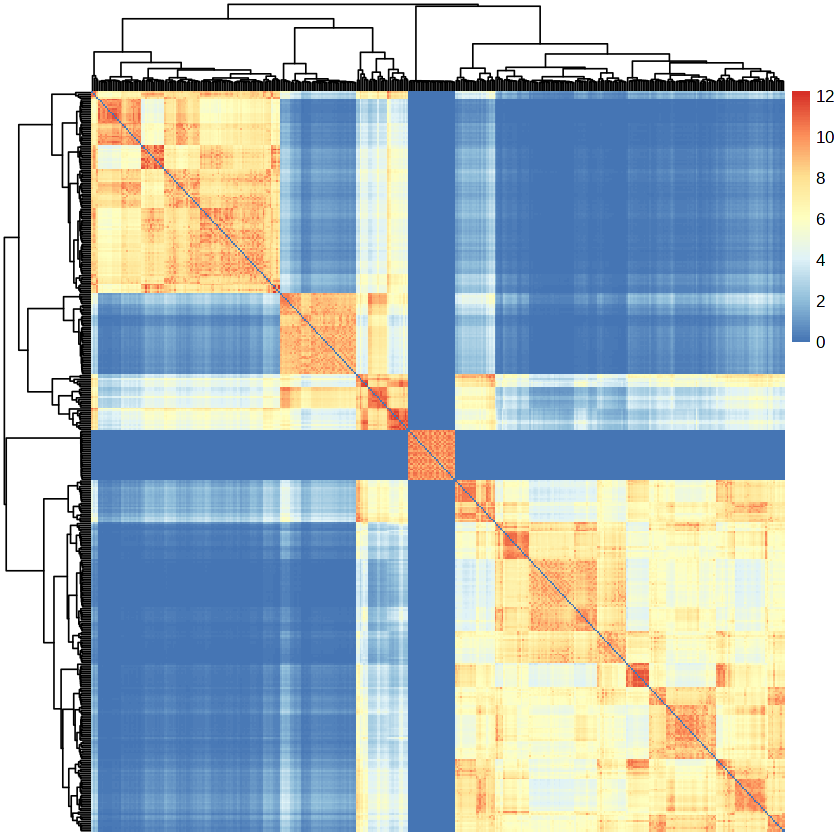

4 clusters detected
cluster 1 -> 192 cells
cluster 2 -> 27 cells
cluster 3 -> 72 cells
cluster 4 -> 109 cells


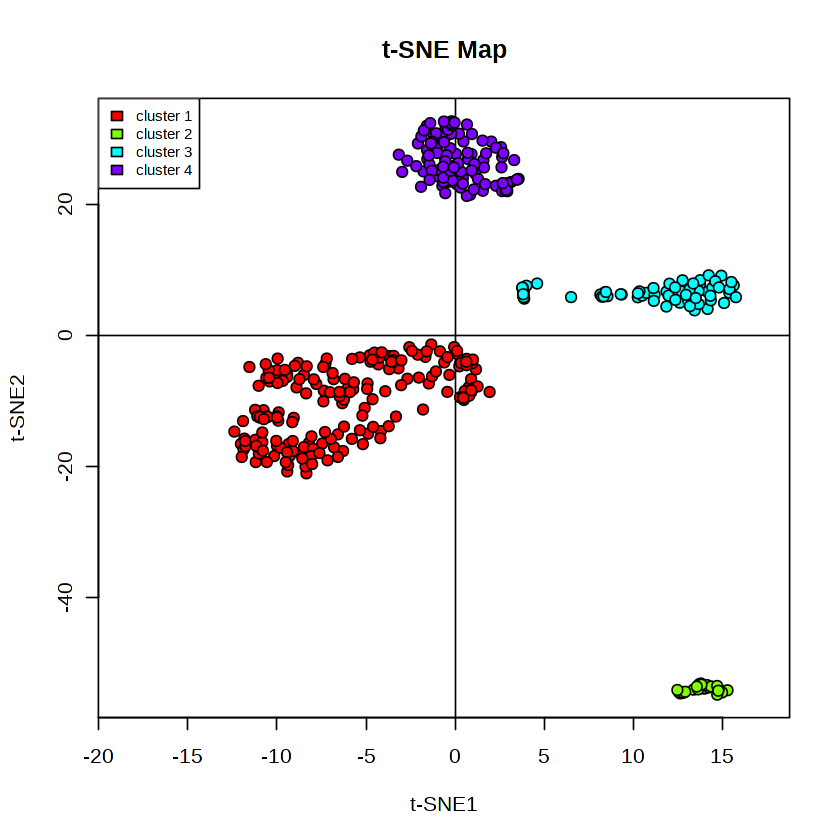

In [8]:
clust <- clustering(data = data, n.cluster = 4, n = 10, method = "simlr",write = FALSE,pdf=FALSE)

Next, differentially expressed genes in one cluster compared to the others are identified using the *cluster_analysis()* function

In [18]:
clust.ana <- cluster_analysis(data = data, genes = rownames(data), cluster = clust$cluster, write = TRUE)

edgeR differential gene expression (dge) processing:
Looking for differentially expressed genes in cluster 1
Looking for differentially expressed genes in cluster 2
Looking for differentially expressed genes in cluster 3
Looking for differentially expressed genes in cluster 4


In [11]:
str(clust.ana)

List of 4
 $ diff.genes:List of 4
  ..$ cluster 1:'data.frame':	1065 obs. of  6 variables:
  .. ..$ genes : chr [1:1065] "IL7R" "CD3D" "TRAC" "CD3G" ...
  .. ..$ logFC : num [1:1065] 2.8 2.51 2.43 2.16 1.83 ...
  .. ..$ logCPM: num [1:1065] 10.8 10.8 10.8 10.7 10.6 ...
  .. ..$ LR    : num [1:1065] 254 190 204 125 88 ...
  .. ..$ PValue: num [1:1065] 3.28e-57 2.51e-43 3.10e-46 5.41e-29 6.59e-21 ...
  .. ..$ FDR   : num [1:1065] 4.98e-54 2.00e-40 2.61e-43 1.75e-26 1.22e-18 ...
  ..$ cluster 2:'data.frame':	160 obs. of  6 variables:
  .. ..$ genes : chr [1:160] "IGHM" "MS4A1" "IGHD" "CD79A" ...
  .. ..$ logFC : num [1:160] 3.91 3.67 3.49 3.49 3.38 ...
  .. ..$ logCPM: num [1:160] 10.6 10.5 10.5 10.6 10.5 ...
  .. ..$ LR    : num [1:160] 300 214 181 204 164 ...
  .. ..$ PValue: num [1:160] 3.10e-67 2.06e-48 3.08e-41 3.07e-46 1.49e-37 ...
  .. ..$ FDR   : num [1:160] 4.71e-63 1.56e-44 9.34e-38 1.56e-42 3.76e-34 ...
  ..$ cluster 3:'data.frame':	203 obs. of  6 variables:
  .. ..$ genes : ch

Next, we can generate cellular interaction lists using the *cell_signaling()* function

In [17]:
signal <- cell_signaling(data = data, genes = rownames(data), cluster = clust$cluster, write = TRUE)

No such file as table_dge_cluster 1.txt in the cluster-analysis folder
No such file as table_dge_cluster 2.txt in the cluster-analysis folder
No such file as table_dge_cluster 3.txt in the cluster-analysis folder
No such file as table_dge_cluster 4.txt in the cluster-analysis folder
Paracrine signaling: 
Checking for signaling between cell types
8 interactions from cluster 1 to cluster 2
36 interactions from cluster 1 to cluster 3
29 interactions from cluster 1 to cluster 4
51 interactions from cluster 2 to cluster 1
85 interactions from cluster 2 to cluster 3
81 interactions from cluster 2 to cluster 4
4 interactions from cluster 3 to cluster 1
5 interactions from cluster 3 to cluster 2
9 interactions from cluster 3 to cluster 4
23 interactions from cluster 4 to cluster 1
17 interactions from cluster 4 to cluster 2
45 interactions from cluster 4 to cluster 3


An intercellular network can also be generated to map the overall ligand/receptor interactions invoking the *inter_network()* function

In [16]:
inter.net <- inter_network(data = data, signal = signal, genes = rownames(data), cluster = clust$cluster, write = TRUE)

Doing cluster 1 and cluster 2 ... OK
Doing cluster 1 and cluster 3 ... OK
Doing cluster 1 and cluster 4 ... OK
Doing cluster 2 and cluster 1 ... OK
Doing cluster 2 and cluster 3 ... OK
Doing cluster 2 and cluster 4 ... OK
Doing cluster 3 and cluster 1 ... OK
Doing cluster 3 and cluster 2 ... OK
Doing cluster 3 and cluster 4 ... OK
Doing cluster 4 and cluster 1 ... OK
Doing cluster 4 and cluster 2 ... OK
Doing cluster 4 and cluster 3 ... OK


At this point the intercellular network have been generated and exported in text and graphML formats in the *networks* folder.
A summary of the interactions between cell clusters can be output in the form of a chord diagram by the *visualize_interactions()* function:

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.



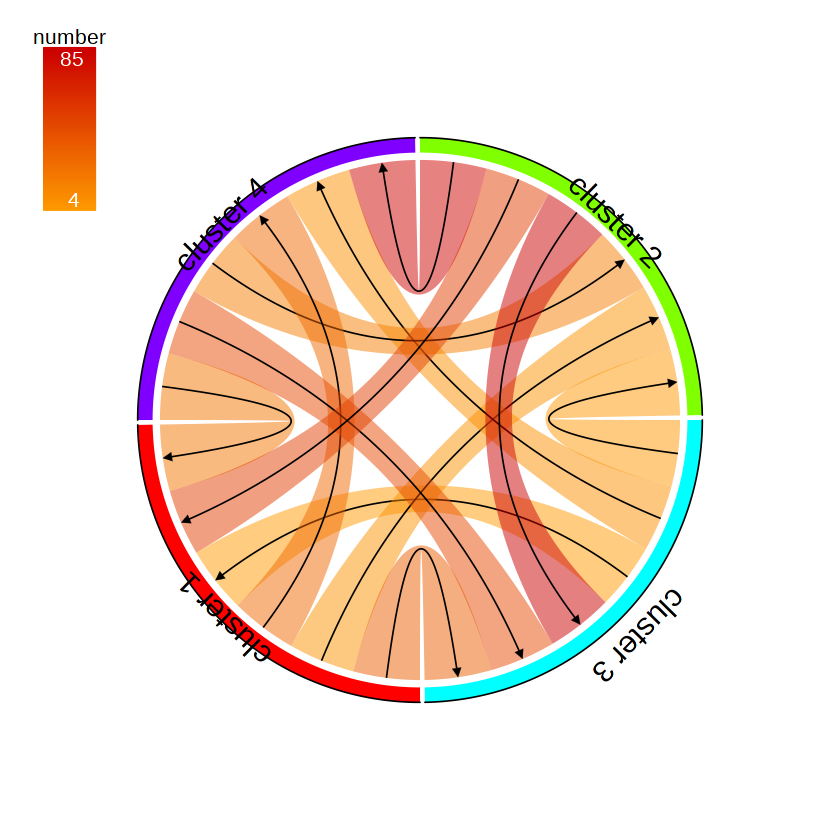

In [19]:
visualize_interactions(signal = signal)

The details of the interactions between two clusters, for example cluster 1 and 2, can also be shown in the plot window with the *visualize_interactions()* function. Note that in the example below we ask for the display of two pairs of cell clusters, pair 1 that contains interactions from cluster 1 to 2, and pair 4 from cluster 2 to 1. (*names(signal)* returns the cell cluster names in each pair, see function *visualize_interactions()* details.)

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not used any more, please directly use argument `major.tick.length`.

`major.tick.percentage` is not

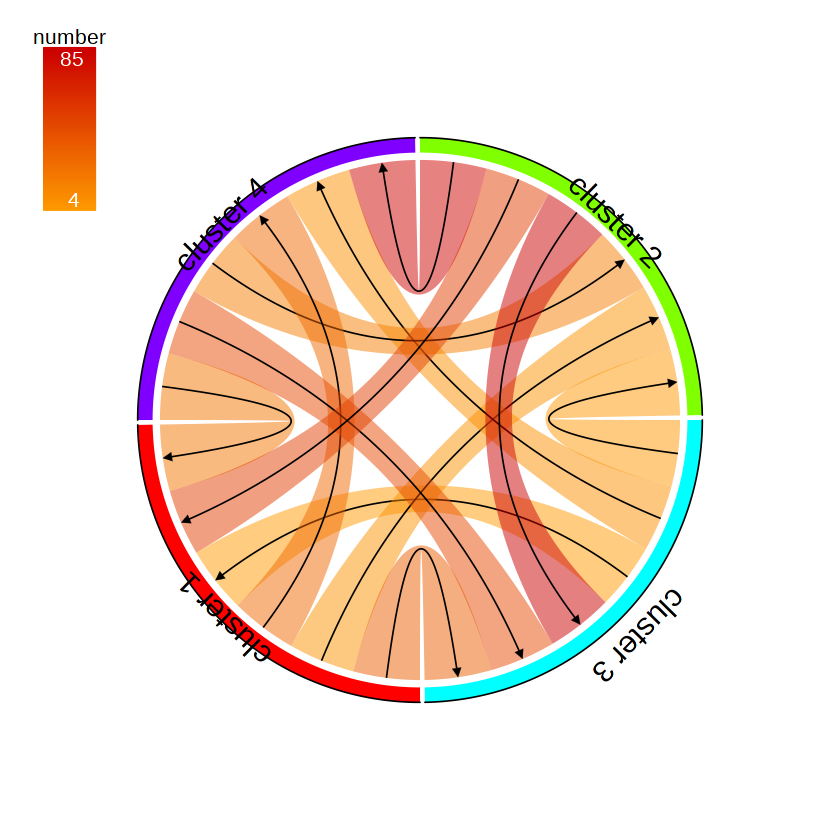

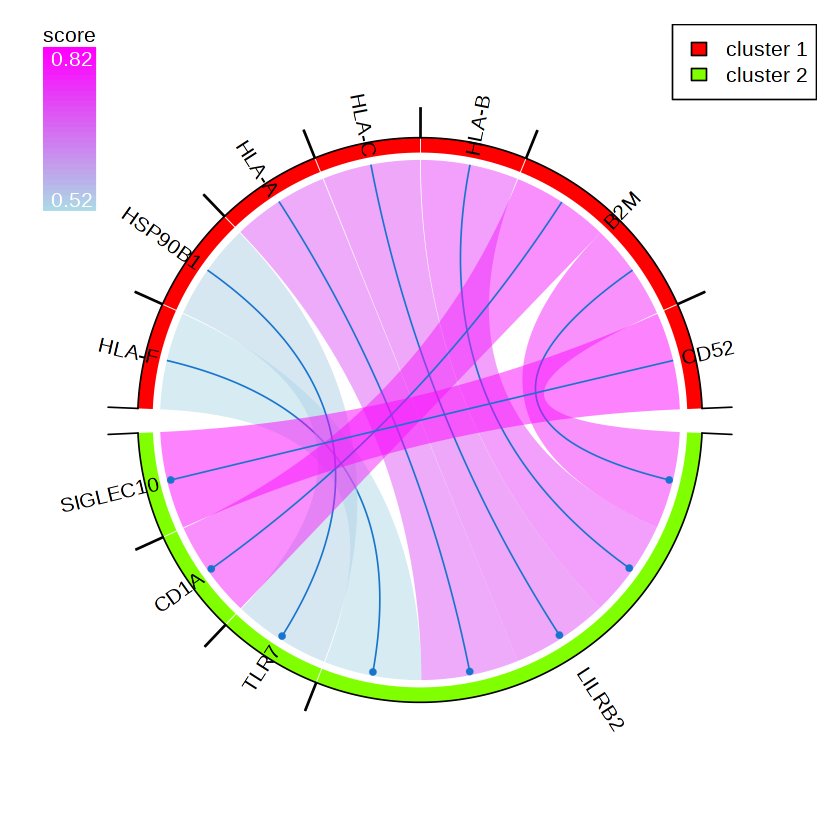

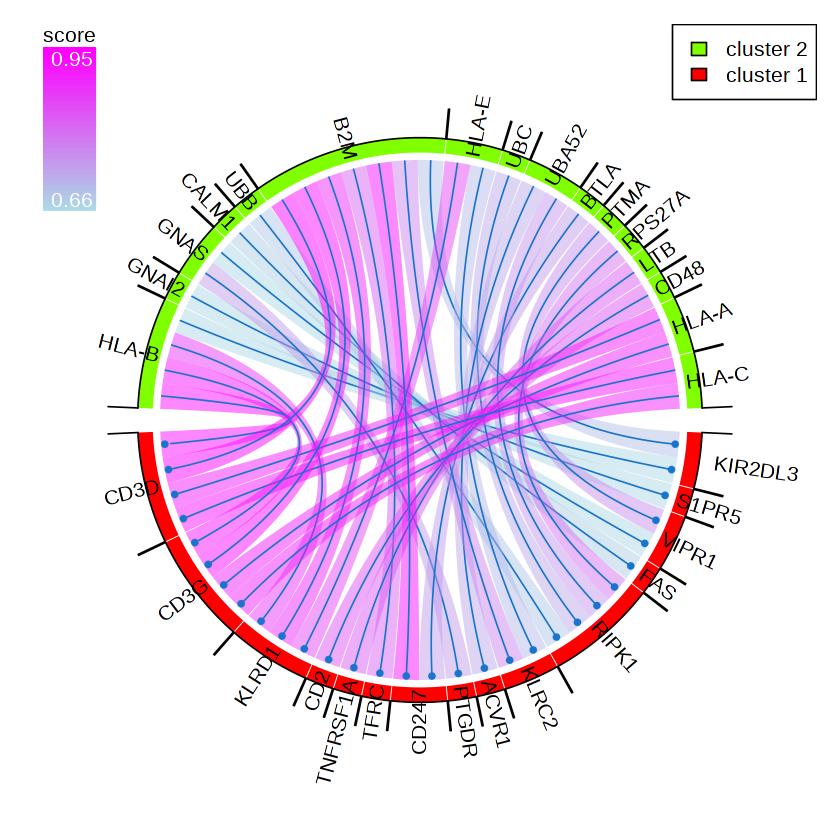

In [22]:
visualize_interactions(signal = signal,show.in=c(1,4), write.in = c(1,4))